In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import numpy as np
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import pandas as pd

In [24]:
X_test = np.load('../preprocessed data/X_test.npy')
y_test = np.load('../preprocessed data/y_test.npy')
y_pred = np.load('../preprocessed data/y_pred.npy')

In [25]:
model = load_model('../model/fake_news_detection_model.h5')
with open('../model/training_history.pkl', 'rb') as f:
    history = pickle.load(f)

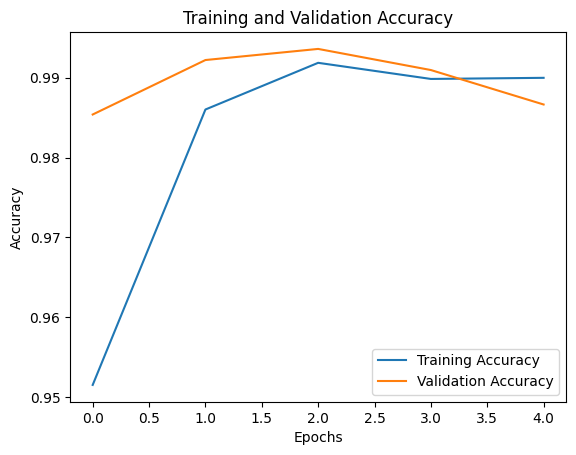

In [28]:
plt.figure()
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

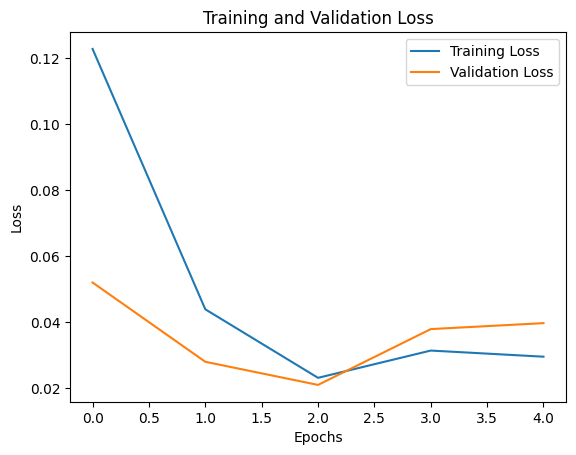

In [17]:
plt.figure()
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

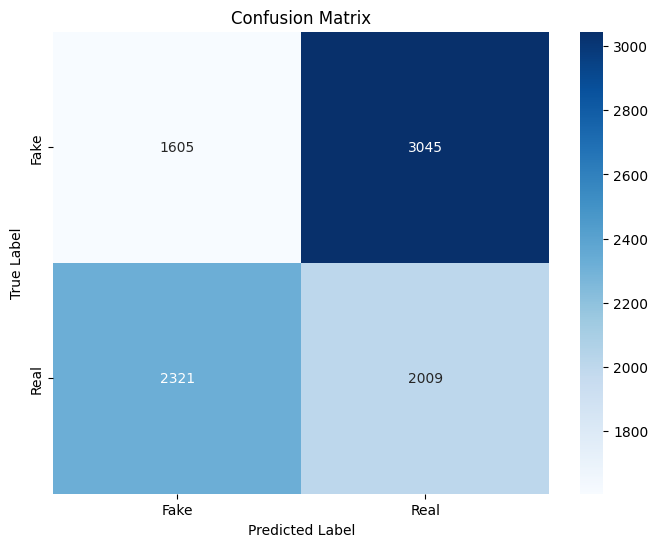

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

Classification Report:

              precision    recall  f1-score   support

        Fake       0.41      0.35      0.37      4650
        Real       0.40      0.46      0.43      4330

    accuracy                           0.40      8980
   macro avg       0.40      0.40      0.40      8980
weighted avg       0.40      0.40      0.40      8980



In [20]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

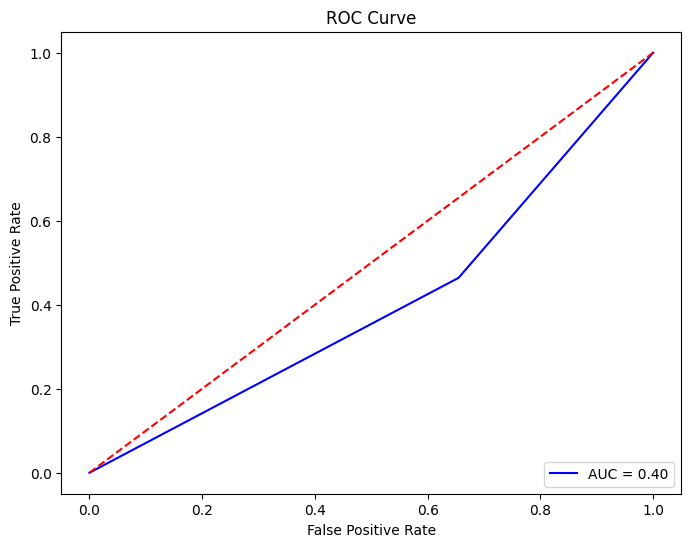

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Model Accuracy: {accuracy * 100:.2f}%")
print(f"AUC Score: {roc_auc:.2f}")

Overall Model Accuracy: 40.24%
AUC Score: 0.40
